# Manifold learning with Feature-type distributed clustering workflow is more informative compared to UMAP for tabular clinical datasets

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
import umap.umap_ as umap
%config InlineBackend.figure_format = 'svg'


In [2]:
from fdc.fdc import feature_clustering
from fdc.fdc import FDC, Clustering
from fdc.fdc import canberra_modified
modified_can = canberra_modified
from fdc.clustering import *

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from cluster_val import *

## Importing pre-processed data

In [3]:
np.random.seed(42)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
np.random.seed(42)
data=data.sample(frac=1) #Shuffle the data set
np.random.seed(42)
i=[x for x in range(299)]

data.set_index(pd.Series(i), inplace=True)

In [5]:
data.drop('DEATH_EVENT',axis=1,inplace=True) # drop the target column

## UMAP on original data

In [6]:
from fdc.fdc import feature_clustering
from fdc.fdc import FDC, Clustering
from fdc.fdc import canberra_modified
modified_can = canberra_modified
from fdc.clustering import *


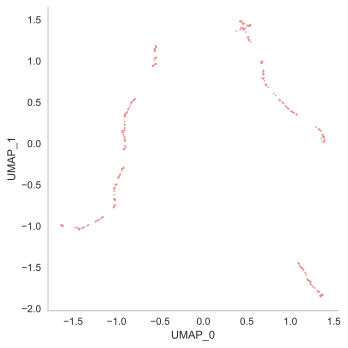

In [7]:
umap_emb=feature_clustering(15,0.1,'euclidean',data,True)

## ANOVA test, Silhouette_score  and Dunn index for umap clusters extracted using K-means clustering

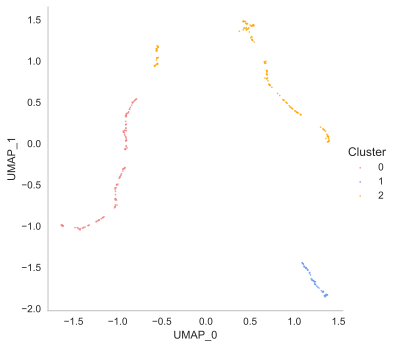

In [8]:
umap_clustering=Clustering(umap_emb,umap_emb,True)
umap_cluster_list,umap_cluster_counts=umap_clustering.K_means(3)

In [9]:
cont_list= ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']

ord_list= ['anaemia','diabetes','high_blood_pressure','sex','smoking']

nom_list= []

In [10]:

### ANOVA TEST 


data['Cluster']=umap_cluster_list
test_results={}
c_names=data.columns
from scipy.stats import f_oneway
for i in c_names[:-1]:
    for j in range(len(np.unique(data.Cluster))):#add -1 if there is noise otherwise not necessary------applicable only for DBSCAN
        var_name="c_"+str(j)
        myVars = vars()
        myVars[var_name]=list(data[i][data["Cluster"]==j])
    
    stats,p_val=f_oneway(c_0,c_1,c_2)
    test_results[i]=stats,float("{:.4f}".format(p_val))

test_results=pd.DataFrame.from_dict(test_results, orient='index', columns=["stats","p_value"])
test_column_list=test_results.index[test_results["p_value"]<0.05].to_list()
ord_count=nom_count=cont_count=0
for i in test_column_list:
    if i in ord_list:
        ord_count+=1
    elif i in nom_list:
        nom_count+=1
    elif i in cont_list:
        cont_count+=1
print('percentage of all features having p-value less than 0.05: ',float("{:.2f}".format((len(test_column_list)/(len(c_names)-1))*100)),'%')
print('percentage of ordinal features having p-value less than 0.05: ',(ord_count/len(ord_list))*100,'%')
#print('percentage of  nominal features having p-value less than 0.05: ',(nom_count/len(nom_list))*100,'%')
print('percentage of continous features having p-value less than 0.05: ',(cont_count/len(cont_list))*100,'%')

percentage of all features having p-value less than 0.05:  8.33 %
percentage of ordinal features having p-value less than 0.05:  0.0 %
percentage of continous features having p-value less than 0.05:  14.285714285714285 %


In [11]:
silhouette_score(umap_emb, umap_cluster_list, metric='euclidean')


0.7283107498506932

## Visualizing Silhouette score (you can also choose the number of clusters based on score)


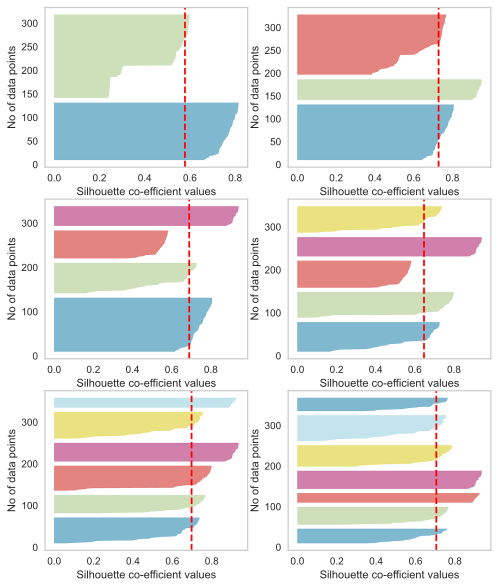

In [12]:
Silhouette_visual(umap_emb)

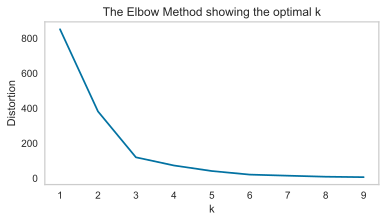

In [13]:
elbow_plot(umap_emb)

In [14]:
dunn_index(cluster_wise_df(umap_emb,umap_cluster_list))

0.6588094997721738

## ANOVA test, Silhouette_score  and Dunn index for umap clusters extracted using Agglomerative clustering

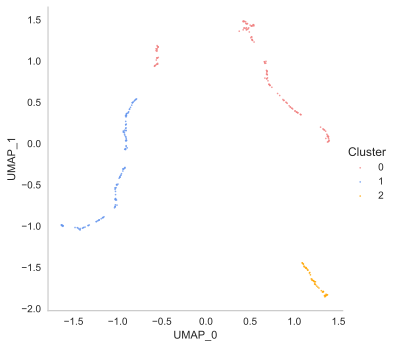

In [15]:
umap_cluster_list_agglo,umap_cluster_counts_agglo=umap_clustering.Agglomerative(3,'euclidean','ward')

In [16]:

### ANOVA TEST

data['Cluster']=umap_cluster_list_agglo
test_results={}
c_names=data.columns
from scipy.stats import f_oneway
for i in c_names[:-1]:
    for j in range(len(np.unique(data.Cluster))):
        var_name="c_"+str(j)
        myVars = vars()
        myVars[var_name]=list(data[i][data["Cluster"]==j])
    
    stats,p_val=f_oneway(c_0,c_1,c_2)
    test_results[i]=stats,float("{:.4f}".format(p_val))

test_results=pd.DataFrame.from_dict(test_results, orient='index', columns=["stats","p_value"])
test_column_list=test_results.index[test_results["p_value"]<0.05].to_list()
ord_count=nom_count=cont_count=0
for i in test_column_list:
    if i in ord_list:
        ord_count+=1
    elif i in nom_list:
        nom_count+=1
    elif i in cont_list:
        cont_count+=1
print('percentage of all features having p-value less than 0.05: ',float("{:.2f}".format((len(test_column_list)/(len(c_names)-1))*100)),'%')
print('percentage of ordinal features having p-value less than 0.05: ',(ord_count/len(ord_list))*100,'%')
#print('percentage of  nominal features having p-value less than 0.05: ',(nom_count/len(nom_list))*100,'%')
print('percentage of continous features having p-value less than 0.05: ',(cont_count/len(cont_list))*100,'%')

percentage of all features having p-value less than 0.05:  8.33 %
percentage of ordinal features having p-value less than 0.05:  0.0 %
percentage of continous features having p-value less than 0.05:  14.285714285714285 %


In [17]:
silhouette_score(umap_emb, umap_cluster_list_agglo, metric='euclidean')

0.6938860634488252

In [18]:
dunn_index(cluster_wise_df(umap_emb,umap_cluster_list_agglo))

0.19627641062789752

## ANOVA test, Silhouette_score  and Dunn index for umap clusters extracted using DBSCAN clustering

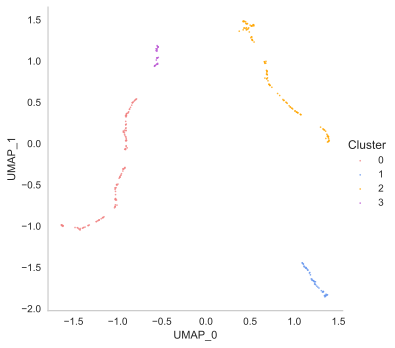

In [19]:
umap_cluster_list_dbscan,umap_cluster_counts_dbscan=umap_clustering.DBSCAN(0.9,20)

In [20]:

### ANOVA TEST

data['Cluster']=umap_cluster_list_dbscan
test_results={}
c_names=data.columns
from scipy.stats import f_oneway
for i in c_names[:-1]:
    for j in range(len(np.unique(data.Cluster))):#add -1 if there is noise otherwise not necessary------applicable only for DBSCAN
        var_name="c_"+str(j)
        myVars = vars()
        myVars[var_name]=list(data[i][data["Cluster"]==j])
    
    stats,p_val=f_oneway(c_0,c_1,c_2,c_3)
    test_results[i]=stats,float("{:.4f}".format(p_val))

test_results=pd.DataFrame.from_dict(test_results, orient='index', columns=["stats","p_value"])
test_column_list=test_results.index[test_results["p_value"]<0.05].to_list()
ord_count=nom_count=cont_count=0
for i in test_column_list:
    if i in ord_list:
        ord_count+=1
    elif i in nom_list:
        nom_count+=1
    elif i in cont_list:
        cont_count+=1
print('percentage of all features having p-value less than 0.05: ',float("{:.2f}".format((len(test_column_list)/(len(c_names)-1))*100)),'%')
print('percentage of ordinal features having p-value less than 0.05: ',(ord_count/len(ord_list))*100,'%')
#print('percentage of  nominal features having p-value less than 0.05: ',(nom_count/len(nom_list))*100,'%')
print('percentage of continous features having p-value less than 0.05: ',(cont_count/len(cont_list))*100,'%')

percentage of all features having p-value less than 0.05:  8.33 %
percentage of ordinal features having p-value less than 0.05:  0.0 %
percentage of continous features having p-value less than 0.05:  14.285714285714285 %


In [21]:
#removing noise indices from the embeddings
non_noise_indices= np.where(np.array(umap_cluster_list_dbscan)!=-1)
umap_emb= umap_emb.iloc[non_noise_indices]
#FDC_emb_low= FDC_emb_low.iloc[non_noise_indices]
umap_cluster_list_dbscan= np.array(umap_cluster_list_dbscan)[non_noise_indices]


In [22]:
silhouette_score(umap_emb, umap_cluster_list_dbscan, metric='euclidean')

0.7358600959478242

In [23]:
dunn_index(cluster_wise_df(umap_emb,umap_cluster_list_dbscan))

0.534617432259154

## Dividing features
- cont_list=continueous features
- ord_list=ordinal features



In [24]:
cont_list= ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']

ord_list= ['anaemia','diabetes','high_blood_pressure','sex','smoking']

In [25]:
len(ord_list)

5

In [26]:
len(cont_list)

7

## FDC on original data

In [27]:
from fdc.fdc import feature_clustering
from fdc.fdc import FDC, Clustering
from fdc.fdc import canberra_modified
modified_can = canberra_modified

FDC.normalize (init): 0.00000 / 0.000s
FDC.normalize (clustering CONT): 2.67188 / 2.672s
FDC.normalize (clustering ORD): 5.04688 / 7.719s
FDC.normalize (clustering NOM): 0.00000 / 7.719s
FDC.normalize (concat): 0.00000 / 7.719s
FDC.normalize (umap 5 -> 2): 2.65625 / 10.375s
FDC.normalize (array -> DataFrame): 0.00000 / 10.375s


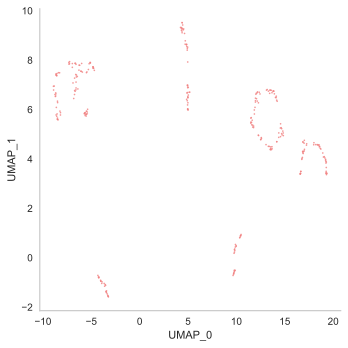

FDC.normalize (plotting): 2.03125 / 12.406s
FDC.normalize (array -> DataFrame): 0.00000 / 12.406s
FDC.normalize (total): 0.00000 / 12.406s


In [28]:

fdc = FDC(clustering_cont=Clustering('euclidean',15,0.1)
          , clustering_ord=Clustering(modified_can,15,0.1,max_components=1)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(data,n_neighbors=15, min_dist=0.1,cont_list=cont_list,ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

## ANOVA test, Silhouette_score  and Dunn index for FDC clusters extracted using K-means clustering

In [29]:
from fdc.clustering import Clustering

In [30]:
FDC_emb_low.rename(columns={"UMAP_0": "FDC_0", "UMAP_1": "FDC_1"},inplace=True)

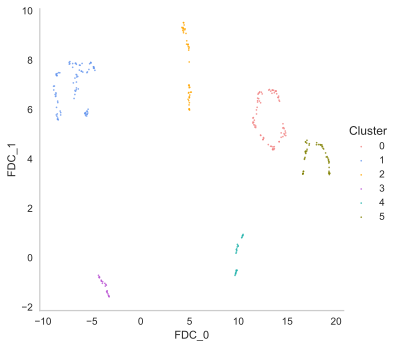

In [31]:
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(6)

In [32]:

### ANOVA TEST

data['Cluster']=cluster_list
test_results={}
c_names=data.columns
from scipy.stats import f_oneway
for i in c_names[:-1]:
    for j in range(len(np.unique(data.Cluster))):#add -1 if there is noise otherwise not necessary------applicable only for DBSCAN
        var_name="c_"+str(j)
        myVars = vars()
        myVars[var_name]=list(data[i][data["Cluster"]==j])
    
    stats,p_val=f_oneway(c_0,c_1,c_2,c_3,c_4,c_5)
    test_results[i]=stats,float("{:.4f}".format(p_val))

test_results=pd.DataFrame.from_dict(test_results, orient='index', columns=["stats","p_value"])
test_column_list=test_results.index[test_results["p_value"]<0.05].to_list()
ord_count=nom_count=cont_count=0
for i in test_column_list:
    if i in ord_list:
        ord_count+=1
    elif i in nom_list:
        nom_count+=1
    elif i in cont_list:
        cont_count+=1
print('percentage of all features having p-value less than 0.05: ',float("{:.2f}".format((len(test_column_list)/(len(c_names)-1))*100)),'%')
print('percentage of ordinal features having p-value less than 0.05: ',(ord_count/len(ord_list))*100,'%')
#print('percentage of  nominal features having p-value less than 0.05: ',(nom_count/len(nom_list))*100,'%')
print('percentage of continous features having p-value less than 0.05: ',(cont_count/len(cont_list))*100,'%')

percentage of all features having p-value less than 0.05:  41.67 %
percentage of ordinal features having p-value less than 0.05:  80.0 %
percentage of continous features having p-value less than 0.05:  14.285714285714285 %


In [33]:
silhouette_score(FDC_emb_low, cluster_list, metric='euclidean')

0.8038663317413856

In [34]:
dunn_index(cluster_wise_df(FDC_emb_low,cluster_list))

1.5133672493350867

## Visualizing Shilhouette score for low_dim fdc embedding


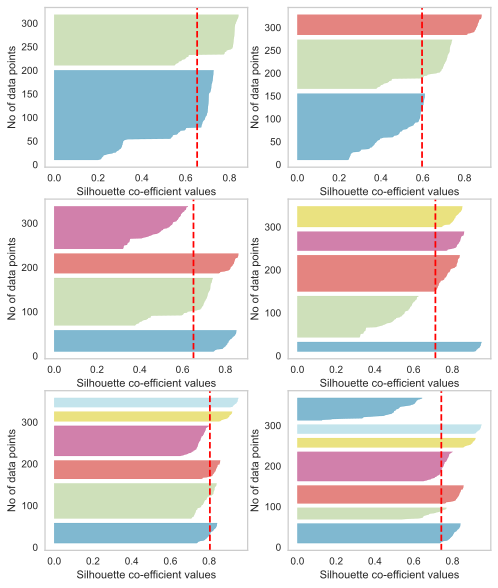

In [35]:
Silhouette_visual(FDC_emb_low)

## Elbow plot for low_dim fdc embedding


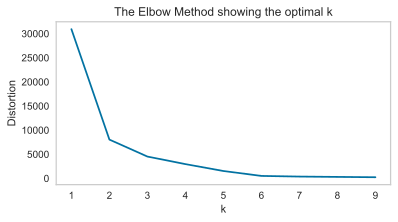

In [36]:
elbow_plot(FDC_emb_low)

## ANOVA test, Silhouette_score  and Dunn index for FDC clusters extracted using Agglomerative clustering

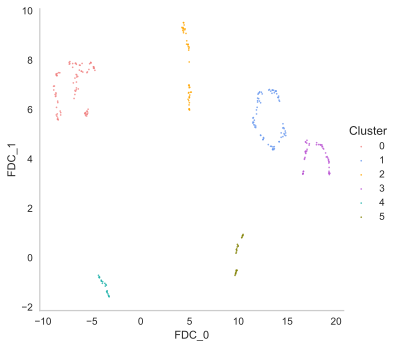

In [37]:
cluster_list_agglo,cluster_counts_agglo=clustering.Agglomerative(6,'euclidean','ward')

In [38]:

### ANOVA TEST

data['Cluster']=cluster_list_agglo
test_results={}
c_names=data.columns
from scipy.stats import f_oneway
for i in c_names[:-1]:
    for j in range(len(np.unique(data.Cluster))):#add -1 if there is noise otherwise not necessary------applicable only for DBSCAN
        var_name="c_"+str(j)
        myVars = vars()
        myVars[var_name]=list(data[i][data["Cluster"]==j])
    
    stats,p_val=f_oneway(c_0,c_1,c_2,c_3,c_4,c_5)
    test_results[i]=stats,float("{:.4f}".format(p_val))

test_results=pd.DataFrame.from_dict(test_results, orient='index', columns=["stats","p_value"])
test_column_list=test_results.index[test_results["p_value"]<0.05].to_list()
ord_count=nom_count=cont_count=0
for i in test_column_list:
    if i in ord_list:
        ord_count+=1
    elif i in nom_list:
        nom_count+=1
    elif i in cont_list:
        cont_count+=1
print('percentage of all features having p-value less than 0.05: ',float("{:.2f}".format((len(test_column_list)/(len(c_names)-1))*100)),'%')
print('percentage of ordinal features having p-value less than 0.05: ',(ord_count/len(ord_list))*100,'%')
#print('percentage of  nominal features having p-value less than 0.05: ',(nom_count/len(nom_list))*100,'%')
print('percentage of continous features having p-value less than 0.05: ',(cont_count/len(cont_list))*100,'%')

percentage of all features having p-value less than 0.05:  41.67 %
percentage of ordinal features having p-value less than 0.05:  80.0 %
percentage of continous features having p-value less than 0.05:  14.285714285714285 %


In [39]:
silhouette_score(FDC_emb_low, cluster_list_agglo, metric='euclidean')

0.780929099920981

In [40]:
dunn_index(cluster_wise_df(FDC_emb_low,cluster_list_agglo))

1.473533935822486

## ANOVA test, Silhouette_score  and Dunn index for FDC clusters extracted using DBSCAN clustering

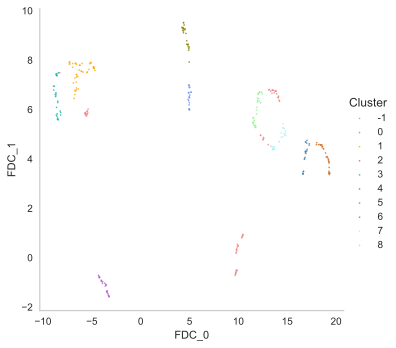

In [41]:
cluster_list_dbscan,cluster_counts_dbscan=clustering.DBSCAN(0.9,20)

In [42]:


### ANOVA TEST


data['Cluster']=cluster_list_dbscan
test_results={}
c_names=data.columns
from scipy.stats import f_oneway
for i in c_names[:-1]:
    for j in range(len(np.unique(data.Cluster))-1):#add -1 if there is noise otherwise not necessary------applicable only for DBSCAN
        var_name="c_"+str(j)
        myVars = vars()
        myVars[var_name]=list(data[i][data["Cluster"]==j])
    
    stats,p_val=f_oneway(c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8)
    test_results[i]=stats,float("{:.4f}".format(p_val))

test_results=pd.DataFrame.from_dict(test_results, orient='index', columns=["stats","p_value"])
test_column_list=test_results.index[test_results["p_value"]<0.05].to_list()
ord_count=nom_count=cont_count=0
for i in test_column_list:
    if i in ord_list:
        ord_count+=1
    elif i in nom_list:
        nom_count+=1
    elif i in cont_list:
        cont_count+=1
print('percentage of all features having p-value less than 0.05: ',float("{:.2f}".format((len(test_column_list)/(len(c_names)-1))*100)),'%')
print('percentage of ordinal features having p-value less than 0.05: ',(ord_count/len(ord_list))*100,'%')
#print('percentage of  nominal features having p-value less than 0.05: ',(nom_count/len(nom_list))*100,'%')
print('percentage of continous features having p-value less than 0.05: ',(cont_count/len(cont_list))*100,'%')

percentage of all features having p-value less than 0.05:  41.67 %
percentage of ordinal features having p-value less than 0.05:  80.0 %
percentage of continous features having p-value less than 0.05:  14.285714285714285 %


In [43]:
cluster_counts_dbscan

array([62, 21, 43, 23, 28, 24, 27, 22, 23, 26], dtype=int64)

In [44]:
#removing noise indices from the embeddings

non_noise_indices= np.where(np.array(cluster_list_dbscan)!=-1)
FDC_emb_high= FDC_emb_high.iloc[non_noise_indices]
FDC_emb_low= FDC_emb_low.iloc[non_noise_indices]
cluster_list_dbscan= np.array(cluster_list_dbscan)[non_noise_indices]


In [45]:
silhouette_score(FDC_emb_low, cluster_list_dbscan, metric='euclidean')

0.7674380224097992

In [46]:
dunn_index(cluster_wise_df(FDC_emb_low,cluster_list_dbscan))

0.2749020412916458